# 0. Load Data

In [2]:

import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence
import pickle
import pandas as pd
from scipy.stats import gaussian_kde
from function import *
from function import PATHS


df=pd.read_csv(PATHS['data_prediction_net_benefit'])

# Load the point density data from pickle
with open(PATHS['point_density'], 'rb') as f:
    density_data = pickle.load(f)

xy_coords = density_data['coordinates'] 
z = density_data['density']


# 1. Emission Map

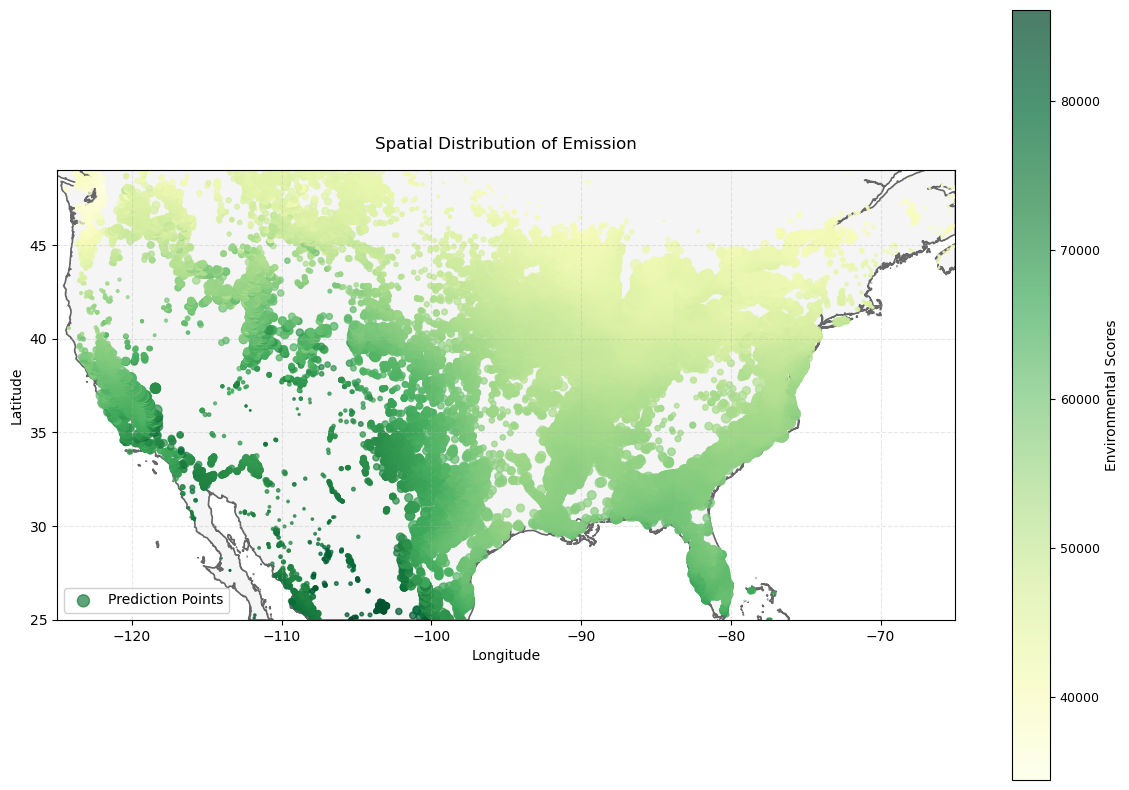

In [4]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde

# Create figure and set size
fig, ax = plt.subplots(figsize=(12,8))

# Define USA mainland bounds
usa_bounds_main = {
        'lon_min': -125,  # Westernmost point (Washington state)
        'lon_max': -65,   # Easternmost point (Maine)
        'lat_min': 25,    # Southernmost point (Florida)
        'lat_max': 49     # Northernmost point (Canada border)
    }
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Set plot bounds to USA mainland
ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

# Draw USA mainland base map with more prominent borders
us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Create gradient colormap for training points (orange)
train_colors = np.array(['#fff2e6', '#ffd9b3', '#ffbf80', '#ffa64d', '#ff8c1a'])  # Light to dark orange
rgb_train_colors = np.linspace(plt.matplotlib.colors.to_rgb(train_colors[0]), 
                        plt.matplotlib.colors.to_rgb(train_colors[-1]), 
                        256)
train_cmap = ListedColormap(rgb_train_colors)



# Plot prediction points with size based on density
scatter = ax.scatter(df['lon'], df['lat'],
                    c=df['carbon_emission (t)/yr'],
                    s=150 * z/z.max(),  # Increased size multiplier from 100 to 150
                    cmap=pred_cmap,
                    alpha=0.7,
                    label='Prediction Points')

# # Plot training points with smaller size
# train_scatter = ax.scatter(us_df_embedding_fill['lon'], us_df_embedding_fill['lat'],
#                           alpha=0.4, s=8, c='orange',  # Reduced size from 15 to 8
#                           label='Training Points')

# Add colorbar
cbar = plt.colorbar(scatter, label='Environmental Scores', ax=ax)
cbar.ax.tick_params(labelsize=9)

# Set chart style
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_title('Spatial Distribution of Emission', 
             fontsize=12, pad=15)
ax.legend(frameon=True, facecolor='white', framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# 2. Opportunity Loss Map

In [ ]:
df=pd.read_csv(PATHS['data_prediction_net_benefit'])

### 2.1 KDE

  0%|          | 0/9 [00:00<?, ?it/s]

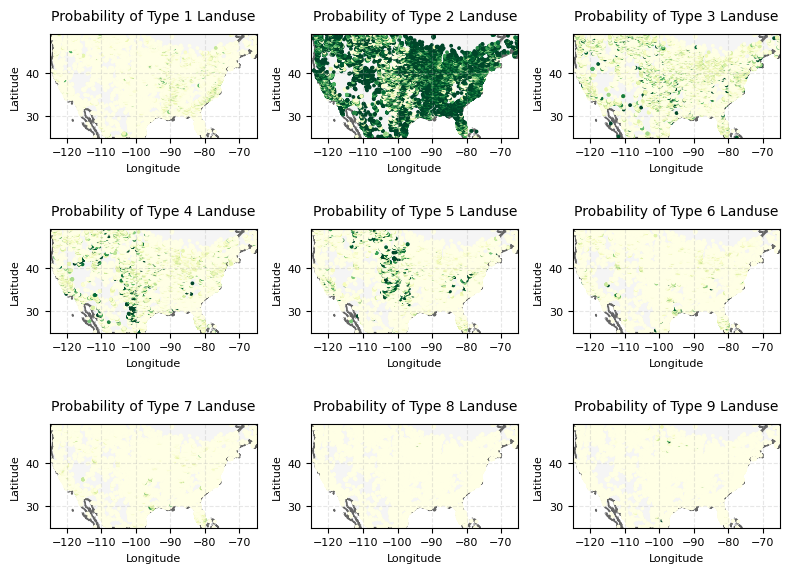

In [10]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
df=pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Create figure with GridSpec
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,  # Westernmost point (Washington state)
    'lon_max': -65,   # Easternmost point (Maine)
    'lat_min': 25,    # Southernmost point (Florida)
    'lat_max': 49     # Northernmost point (Canada border)
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Plot each weighted density in a subplot
for i in tqdm(range(9)):
    row = i // 3
    col = i % 3
    weight_num = i + 1
    
    ax = fig.add_subplot(gs[row, col])
    
    # Set plot bounds to USA mainland
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    
    # Draw USA mainland base map
    us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)
    
    # Plot prediction points
    scatter = ax.scatter(df['lon'], df['lat'],
                        c=df[f'weighted_density_{weight_num}'],
                        s=3,  # Smaller point size for subplots
                        cmap=pred_cmap)
    
    # # Add colorbar
    # plt.colorbar(scatter, ax=ax, label=f'Density {weight_num}')
    
    # Set chart style
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_title(f'Probability of Type {weight_num} Landuse', 
                 fontsize=10, pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.2 County_Plane

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Agricultural type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Others type...


  0%|          | 0/3233 [00:00<?, ?it/s]

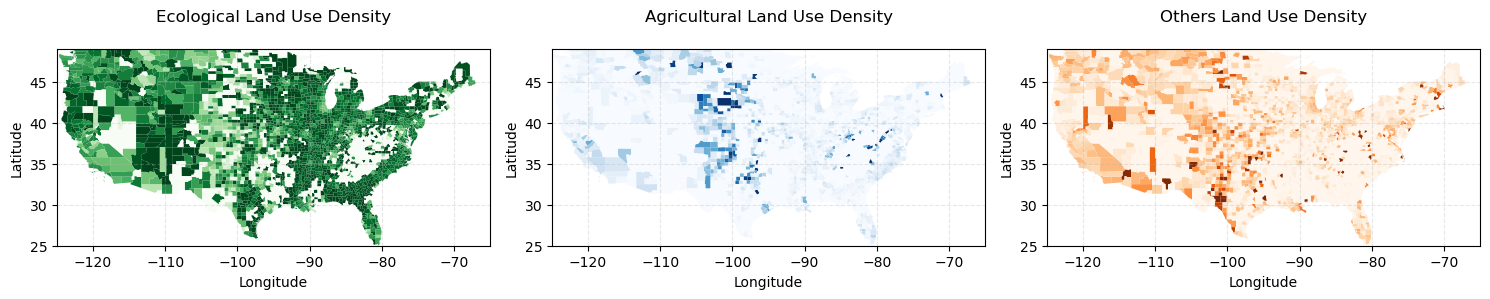

In [52]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
from rtree import index
import matplotlib.gridspec as gridspec

# Read data
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

us_county = gpd.read_file(PATHS['us_county'])

# Create figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}

# Create spatial index
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

# Plot for each combined type
type_names = ['Ecological', 'Agricultural', 'Others']
cmaps = ['Greens', 'Blues', 'Oranges']  # Different color schemes for each type

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    county_densities = []
    
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        county_densities.append(mean_density)

    us_county[f'mean_density_type{idx+1}'] = county_densities
    
    # Create subplot using GridSpec
    ax = fig.add_subplot(gs[0, idx])
    
    # Plot choropleth map without colorbar
    us_county.plot(column=f'mean_density_type{idx+1}', 
                   ax=ax,
                   legend=False,
                   cmap=cmaps[idx],  # Use different color scheme for each type
                   missing_kwds={'color': 'lightgrey'})

    # Set bounds
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

    # Style
    ax.set_title(f'{type_names[idx]} Land Use Density', pad=20)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Choropleth Map

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

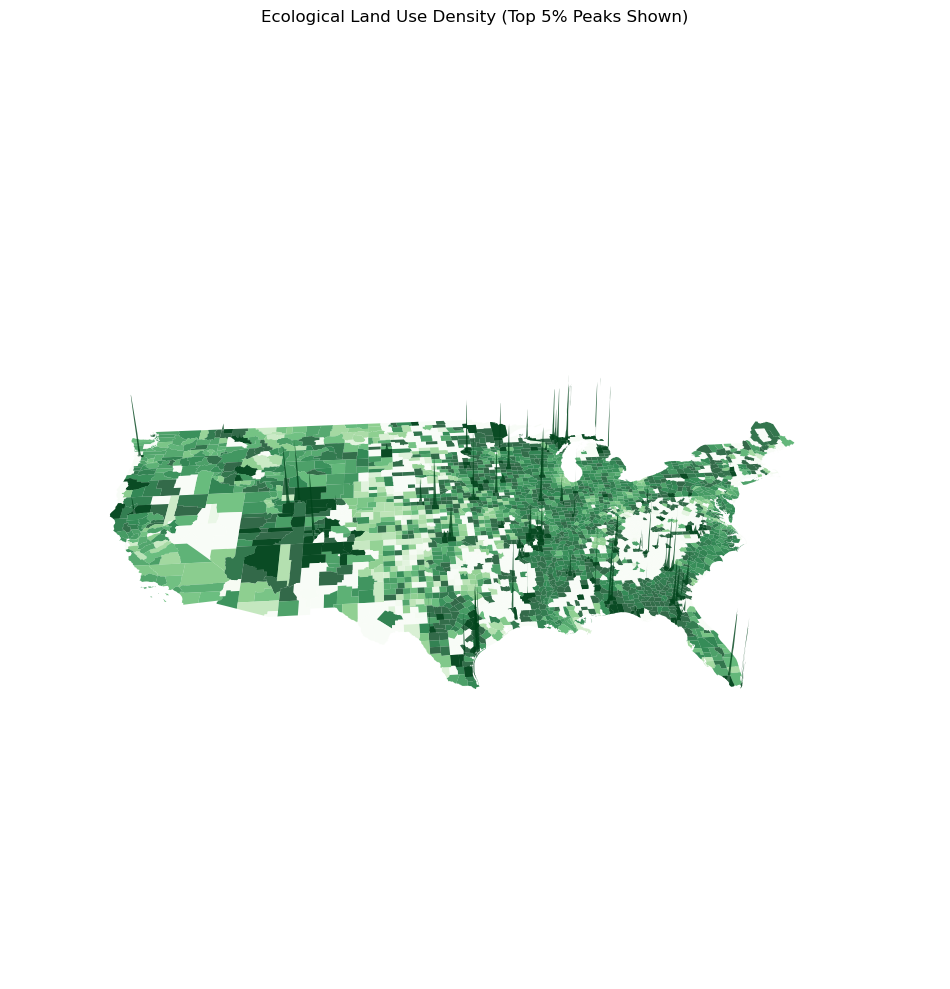

Calculating county densities for Agricultural type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

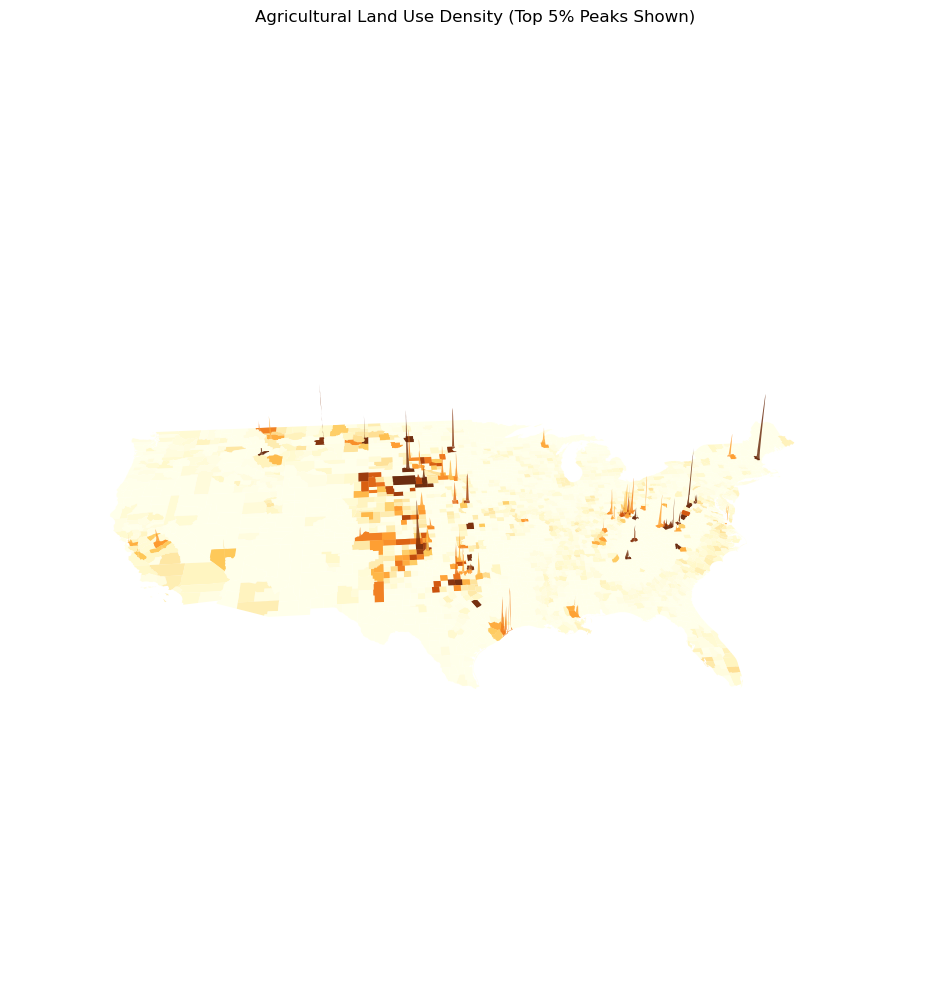

Calculating county densities for Others type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

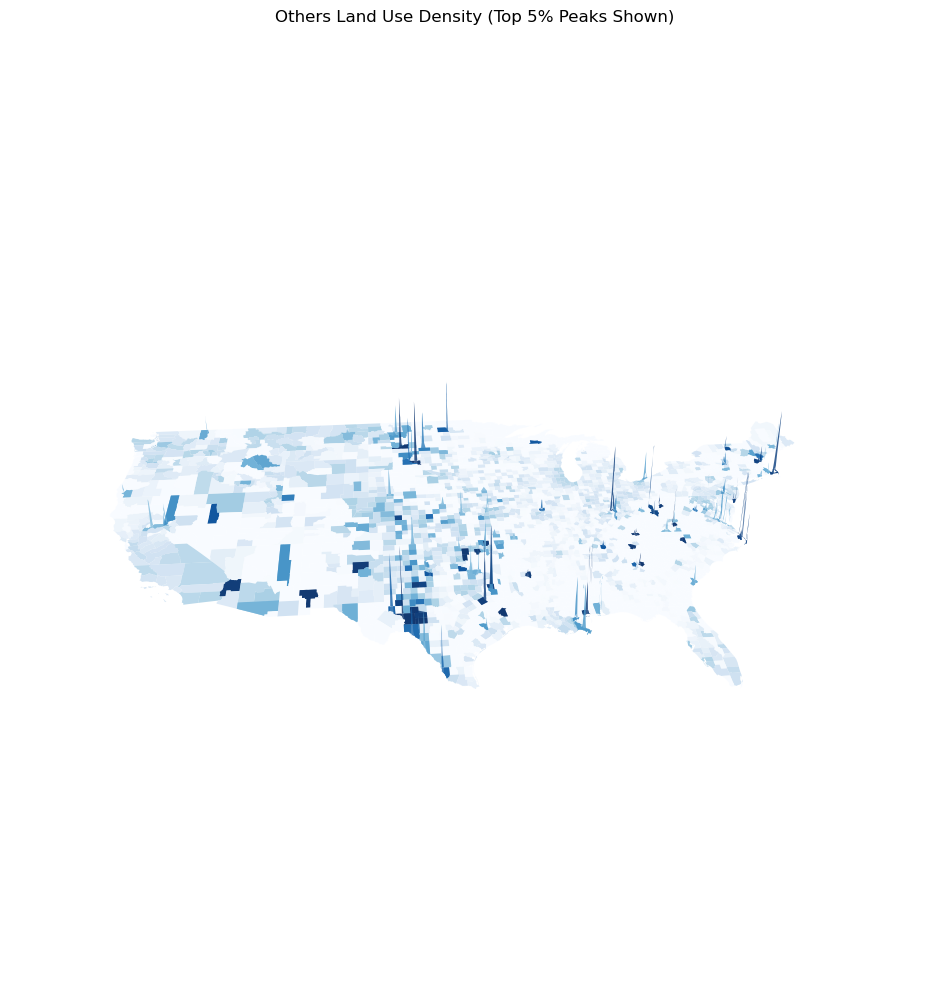

In [54]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from function import PATHS
from rtree import index
from tqdm.auto import tqdm

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

# 读取county数据并裁剪到bbox范围
us_county = gpd.read_file(PATHS['us_county'])
us_county = us_county.to_crs(epsg=4326).clip(bbox)  # 确保使用WGS84坐标系并裁剪

# 读取密度数据
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

# 过滤bound范围内的点
df = df[(df['lon'] >= usa_bounds_main['lon_min']) & 
        (df['lon'] <= usa_bounds_main['lon_max']) & 
        (df['lat'] >= usa_bounds_main['lat_min']) & 
        (df['lat'] <= usa_bounds_main['lat_max'])].reset_index(drop=True)

# 创建空间索引
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

type_names = ['Ecological', 'Agricultural', 'Others']
# Define color schemes for each type
color_schemes = [plt.cm.Greens, plt.cm.YlOrBr, plt.cm.Blues]

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    us_county[f'mean_density_type{idx+1}'] = 0.0  # Initialize density column
    
    for county_idx, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        us_county.at[county_idx, f'mean_density_type{idx+1}'] = mean_density

    # Create new figure for each type
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111, projection='3d')

    # 设置显示山峰的百分比阈值（1%）
    percentile = 5
    density_threshold = np.percentile(us_county[f'mean_density_type{idx+1}'].values, 100 - percentile)
    height_scale = 0.15
    sigma = 0.05  # 控制山峰的宽度，值越小山峰越陡峭

    # 绘制每个county的3D表示
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        county_boundary = county.geometry
        mean_density = county[f'mean_density_type{idx+1}']
        
        if mean_density >= 0:  # 只绘制有数据的county
            if county_boundary.geom_type == 'Polygon':
                x, y = county_boundary.exterior.xy
                x = np.array(x)
                y = np.array(y)
                
                # 创建底部平面
                verts_bottom = [list(zip(x, y, [0]*len(x)))]
                poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                ax.add_collection3d(poly_bottom)
                
                if mean_density > density_threshold:
                    # 创建山峰效果
                    center_x, center_y = np.mean(x), np.mean(y)
                    z = np.zeros_like(x)
                    for i in range(len(x)):
                        dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                        z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                    
                    # 创建顶部山峰
                    verts_top = [list(zip(x, y, z))]
                    poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_top)
                    
            elif county_boundary.geom_type == 'MultiPolygon':
                for polygon in county_boundary.geoms:
                    x, y = polygon.exterior.xy
                    x = np.array(x)
                    y = np.array(y)
                    
                    # 创建底部平面
                    verts_bottom = [list(zip(x, y, [0]*len(x)))]
                    poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_bottom)
                    
                    if mean_density > density_threshold:
                        # 创建山峰效果
                        center_x, center_y = np.mean(x), np.mean(y)
                        z = np.zeros_like(x)
                        for i in range(len(x)):
                            dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                            z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                        
                        # 创建顶部山峰
                        verts_top = [list(zip(x, y, z))]
                        poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                        ax.add_collection3d(poly_top)

    # 设置视角
    ax.set_proj_type('persp', focal_length=0.25)
    ax.view_init(elev=30, azim=-95)

    # 设置坐标轴范围
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    ax.set_zlim(0, 1)  # 设置z轴范围，这样高度缩放就会生效

    # 设置坐标轴比例
    ax.set_box_aspect([1.5, 1, height_scale])  # 设置x:y:z的比例为2:1:0.5

    # 设置标题
    ax.set_title(f'{type_names[idx]} Land Use Density (Top {percentile}% Peaks Shown)', pad=20)

    # 隐藏坐标轴
    ax.set_axis_off()

    # 调整布局并显示
    plt.tight_layout()
    plt.show()